# 6.2 权重的初始值

## 6.2.2 隐藏层的激活值的分布

## 6.2.3 ReLU的权重初始值

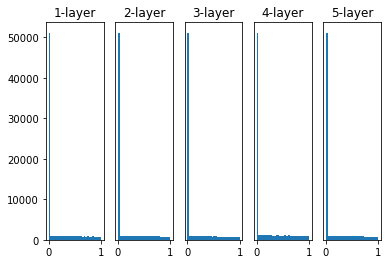

In [5]:
# ch06/weight_init_activation_histogram.py
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
    
# 高斯分布生成1000个数据
input_data = np.random.randn(1000, 100) 
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

x = input_data

for i in range(hidden_layer_size):

    if i != 0:
        x = activations[i-1]

    # =========== 改变权重初始值（权重尺度）进行实验！==============
    
    #==== 激活值的分布要求有适当的广度，要求数据“无偏向” ====

    # 标准差为1的高斯分布，梯度消失
    # w = np.random.randn(node_num, node_num) * 1 

    # 神经元“表现力受限”
    # w = np.random.randn(node_num, node_num) * 0.01

    #==== Xavier初始值 ====
    # 利用tanh可以改善后期分布的歪斜
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    #==== He初始值 ====
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 将激活函数的种类也改变，来进行实验！
    # z = sigmoid(a)
    # # 用作激活函数的函数最好具有关于【原点对称】的性质
    # z = tanh(a) 
    z = ReLU(a)

    activations[i] = z


# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.2.4 基于MINIST数据集的权重初始值的比较

===========iteration:0===========
std=0.01:2.3025502884925446
Xavier:2.306079161374746
He:2.362332376051607
===========iteration:100===========
std=0.01:2.3016522757760995
Xavier:2.271883389449509
He:1.6242645155657054
===========iteration:200===========
std=0.01:2.3028841188407787
Xavier:2.108258942452944
He:0.778362810522779
===========iteration:300===========
std=0.01:2.300209627050779
Xavier:1.8567677328735803
He:0.4871541741811579
===========iteration:400===========
std=0.01:2.3024294955234583
Xavier:1.3950797068172922
He:0.42147036645461095
===========iteration:500===========
std=0.01:2.3011378044021455
Xavier:0.9751992031467624
He:0.41444064068366915
===========iteration:600===========
std=0.01:2.3009627617563195
Xavier:0.7456477970377544
He:0.3961415914954059
===========iteration:700===========
std=0.01:2.301423098349444
Xavier:0.4453758255322649
He:0.23155955282610097
===========iteration:800===========
std=0.01:2.3038609180957423
Xavier:0.5325573499247767
He:0.307883069190386

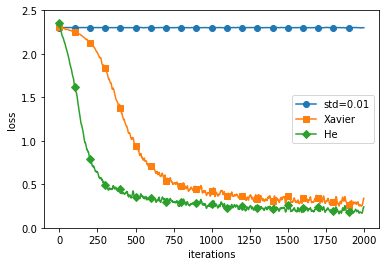

In [6]:
# ch06/weight_init_compare.py
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()